# Hopfield Videos

Here is the code to make a video for the Hopfield network

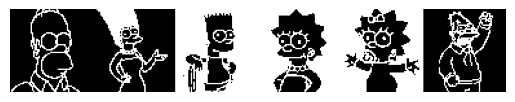

In [17]:
import numpy as np
import json
from matplotlib import pyplot as plt

simpsons_family=['Homer','Marge','Bart','Lisa','Maggie','Grampa']
files=[f'simpsons_json/{character}.json' for character in simpsons_family]

def make_pattern_array(files):
    out=np.empty((len(files),64,64))
    for i,file in enumerate(files):
        with open(file) as f:
            out[i]=(np.array(json.load(f))==1)*2-1
    return out

patterns=make_pattern_array(files)
plt.imshow(patterns.reshape(len(files)*64,64).transpose(), cmap='Greys')
plt.axis('off')
plt.show()

In [14]:
from project.simulations.FC_hopfield import FC_Hopfield

def half_pattern(pattern):
    out=pattern.copy()
    out[32:]=np.ones((32,64))
    return out
starting_state=half_pattern(patterns[0])

hop=FC_Hopfield(patterns, starting_state)

def make_video_array(frames, steps_per_frame, temperature):
    out=np.empty((frames,64,64))
    for i in range(frames):
        out[i]=hop.simulation_steps(steps_per_frame,temperature).reshape(64,64)
    
    return out

video_array=make_video_array(1000,30,5e-1)

In [15]:
def enlarge(array,k):
    out=np.zeros((array.shape[0],k*array.shape[1],k*array.shape[2]))
    for i in range(array.shape[1]*k):
        for j in range(array.shape[2]*k):
           out[:,i,j]=array[:,j//k,i//k] 
    return out

video_array=enlarge(video_array,10)

In [16]:
import cv2
import numpy as np

# Assuming video_array is defined and has the correct shape
size = video_array.shape[1:] * 5
fps = 30
path = 'project/media/videos/simpsons.mp4'

# Create a VideoWriter object
out = cv2.VideoWriter(path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)

# Write each frame to the video file
for i in range(len(video_array)):
    data = video_array[i].astype(np.uint8)
    out.write(data)

# Release the VideoWriter
out.release()
